In [ ]:
!pip install split-folders

#Midterm Project by Paul Tuccinardi

##Lung cancer CNN detection

#Data Preparation

Data: This data has 3 folders one for benign, adnocarcinoma and squamous cell carcinoma which each contain 5,000 images. Due to the large data size, the data was uploaded to my google drive to save time.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import shutil
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
adenocarcinoma_path='/content/drive/MyDrive/adenocarcinoma'
benign_path='/content/drive/MyDrive/benign'
squamous_cell_carcinoma_path='/content/drive/MyDrive/squamous_cell_carcinoma'

In [ ]:
# def split_data(source_dir, train_dir, val_dir, test_dir, val_size=0.2, test_size=0.1):
#     for label in ['adenocarcinoma', 'benign', 'squamous_cell_carcinoma']:
#         files = os.listdir(os.path.join(source_dir, label))
#         train_files, val_test_files = train_test_split(files, test_size=val_size + test_size)
#         val_files, test_files = train_test_split(val_test_files, test_size=test_size / (val_size + test_size))

#         for file in train_files:
#             shutil.copy(os.path.join(source_dir, label, file), os.path.join(train_dir, label, file))
#         for file in val_files:
#             shutil.copy(os.path.join(source_dir, label, file), os.path.join(val_dir, label, file))
#         for file in test_files:
#             shutil.copy(os.path.join(source_dir, label, file), os.path.join(test_dir, label, file))

In [ ]:
# # Create a main input directory if it doesn't exist
# main_input_dir = '/content/drive/MyDrive/all_images'  # Or any suitable path
# os.makedirs(main_input_dir, exist_ok=True)

# # Create subdirectories for each class within the main input directory
# class_dirs = ['adenocarcinoma', 'benign', 'squamous_cell_carcinoma']
# for class_dir in class_dirs:
#     os.makedirs(os.path.join(main_input_dir, class_dir), exist_ok=True)

# # Move images into their respective class subdirectories
# # Note: Replace '*.jpg' with the actual file extension of your images if it's different
# for filename in os.listdir(adenocarcinoma_path):
#     if filename.endswith('.jpg'):
#         shutil.move(os.path.join(adenocarcinoma_path, filename),
#                     os.path.join(main_input_dir, 'adenocarcinoma', filename))

# for filename in os.listdir(benign_path):
#     if filename.endswith('.jpg'):
#         shutil.move(os.path.join(benign_path, filename),
#                     os.path.join(main_input_dir, 'benign', filename))

# for filename in os.listdir(squamous_cell_carcinoma_path):
#     if filename.endswith('.jpg'):
#         shutil.move(os.path.join(squamous_cell_carcinoma_path, filename),
#                     os.path.join(main_input_dir, 'squamous_cell_carcinoma', filename))

# # Now use the main_input_dir for splitting
# output_dir = '/content/drive/MyDrive/split_data'
# splitfolders.ratio(main_input_dir, output=output_dir, seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)


In [1]:
# # prompt: add labels to the images depending on what folder they are in

# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models
# import matplotlib.pyplot as plt
# import os
# import shutil
# import splitfolders
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from google.colab import drive
# from sklearn.model_selection import train_test_split


# drive.mount('/content/drive')
# adenocarcinoma_path='/content/drive/MyDrive/adenocarcinoma'
# benign_path='/content/drive/MyDrive/benign'
# squamous_cell_carcinoma_path='/content/drive/MyDrive/squamous_cell_carcinoma'
# main_input_dir = '/content/drive/MyDrive/all_images'
# def split_data(source_dir, train_dir, val_dir, test_dir, val_size=0.2, test_size=0.1):
#     for label in ['adenocarcinoma', 'benign', 'squamous_cell_carcinoma']:
#         files = os.listdir(os.path.join(source_dir, label))
#         train_files, val_test_files = train_test_split(files, test_size=val_size + test_size, random_state=42) #added random state for reproducibility
#         val_files, test_files = train_test_split(val_test_files, test_size=test_size / (val_size + test_size), random_state=42)

#         os.makedirs(os.path.join(train_dir, label), exist_ok=True)
#         os.makedirs(os.path.join(val_dir, label), exist_ok=True)
#         os.makedirs(os.path.join(test_dir, label), exist_ok=True)

#         for file in train_files:
#             shutil.copy(os.path.join(source_dir, label, file), os.path.join(train_dir, label, file))
#         for file in val_files:
#             shutil.copy(os.path.join(source_dir, label, file), os.path.join(val_dir, label, file))
#         for file in test_files:
#             shutil.copy(os.path.join(source_dir, label, file), os.path.join(test_dir, label, file))

# # ... (rest of your code) ...
# output_dir = '/content/drive/MyDrive/split_data'
# splitfolders.ratio(main_input_dir, output=output_dir, seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

# # Example usage after splitting:  (Adjust paths as needed)
# train_dir = '/content/drive/MyDrive/split_data/train'
# val_dir = '/content/drive/MyDrive/split_data/val'

# #ImageDataGenerator automatically labels based on the directory names.
# train_datagen = ImageDataGenerator(rescale=1./255)  # Adjust rescale if needed
# val_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         train_dir,
#         target_size=(150, 150), # Adjust target size as needed
#         batch_size=32,
#         class_mode='categorical') #'categorical' for multi-class

# validation_generator = val_datagen.flow_from_directory(
#         val_dir,
#         target_size=(150, 150), # Adjust target size as needed
#         batch_size=32,
#         class_mode='categorical') #'categorical' for multi-class



In [ ]:
# prompt: Create a train test split of the data

# Example usage after splitting:  (Adjust paths as needed)
train_dir = '/content/drive/MyDrive/split_data/train'
val_dir = '/content/drive/MyDrive/split_data/val'
test_dir = '/content/drive/MyDrive/split_data/test' # Added test directory

#ImageDataGenerator automatically labels based on the directory names.
train_datagen = ImageDataGenerator(rescale=1./255)  # Adjust rescale if needed
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255) # Added test datagen

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150), # Adjust target size as needed
        batch_size=32,
        class_mode='categorical') #'categorical' for multi-class

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150), # Adjust target size as needed
        batch_size=32,
        class_mode='categorical') #'categorical' for multi-class

test_generator = test_datagen.flow_from_directory( # Added test generator
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False # Important: Do not shuffle the test data
)

Found 12040 images belonging to 3 classes.
Found 1201 images belonging to 3 classes.
Found 1004 images belonging to 3 classes.


#Creating the CNN Model

In [ ]:
import shutil

# prompt: create a cnn to classify the data into the 3 different classes
IMG_WIDTH =150
IMG_HEIGHT=150

# Clear the output directory to ensure a clean split
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
    print(f"Removed existing output directory: {output_dir}")

# Re-run the splitfolders.ratio to ensure a clean and correct split
# This line should ideally be in a preceding cell where data splitting occurs,
# but for demonstration, we include it here to ensure data consistency.
# You might want to move this part back to cell 1DytiH5aZjpO after this fix.
splitfolders.ratio(main_input_dir, output=output_dir, seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)


# Re-initialize the data generators after splitting to ensure they pick up the correct directory structure
train_dir = '/content/drive/MyDrive/split_data/train'
val_dir = '/content/drive/MyDrive/split_data/val'
test_dir = '/content/drive/MyDrive/split_data/test'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=32,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


model = models.Sequential()
model.add(layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))) # Add an Input layer to explicitly define input shape
model.add(layers.Conv2D(256, (3, 3), activation='relu')) # input_shape not needed here anymore
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax')) # 3 output units for 3 classes

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // validation_generator.batch_size)


# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f"Test accuracy: {test_acc}")

Removed existing output directory: /content/drive/MyDrive/split_data



Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  1.15 files/s]
Copying files: 10 files [00:00, 13.25 files/s]
Copying files: 18 files [00:01, 23.89 files/s]
Copying files: 27 files [00:01, 35.80 files/s]
Copying files: 36 files [00:01, 46.37 files/s]
Copying files: 47 files [00:01, 57.88 files/s]
Copying files: 53 files [00:20, 57.88 files/s]
Copying files: 54 files [00:40,  1.52s/ files]
Copying files: 64 files [00:40,  1.02 files/s]
Copying files: 74 files [00:40,  1.53 files/s]
Copying files: 83 files [00:40,  2.17 files/s]
Copying files: 92 files [00:40,  3.08 files/s]
Copying files: 101 files [00:40,  4.34 files/s]
Copying files: 111 files [00:40,  6.26 files/s]
Copying files: 121 files [00:41,  8.89 files/s]
Copying files: 130 files [00:41, 12.00 files/s]
Copying files: 139 files [00:41, 15.98 files/s]
Copying files: 148 files [00:41, 20.91 files/s]
Copying files: 157 files [00:41, 27.04 files/s]
Copying files: 166 files [00:41, 33.57 files/s]
Copying fi

Found 12040 images belonging to 3 classes.
Found 1505 images belonging to 3 classes.
Found 1505 images belonging to 3 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
376/376 ━━━━━━━━━━━━━━━━━━━━ 157s 378ms/step - accuracy: 0.7054 - loss: 0.6008 - val_accuracy: 0.8570 - val_loss: 0.3595
Epoch 2/5
  1/376 ━━━━━━━━━━━━━━━━━━━━ 51s 138ms/step - accuracy: 0.9062 - loss: 0.3544

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


376/376 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9062 - loss: 0.3544 - val_accuracy: 0.8664 - val_loss: 0.3121
Epoch 3/5
376/376 ━━━━━━━━━━━━━━━━━━━━ 133s 353ms/step - accuracy: 0.9010 - loss: 0.2526 - val_accuracy: 0.8770 - val_loss: 0.3002
Epoch 4/5
376/376 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8125 - loss: 0.3347 - val_accuracy: 0.9003 - val_loss: 0.2916
Epoch 5/5
376/376 ━━━━━━━━━━━━━━━━━━━━ 125s 332ms/step - accuracy: 0.9095 - loss: 0.2287 - val_accuracy: 0.9289 - val_loss: 0.1789
48/48 - 13s - 269ms/step - accuracy: 0.9249 - loss: 0.1893
Test accuracy: 0.9249169230461121


#Testing model

48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 247ms/step


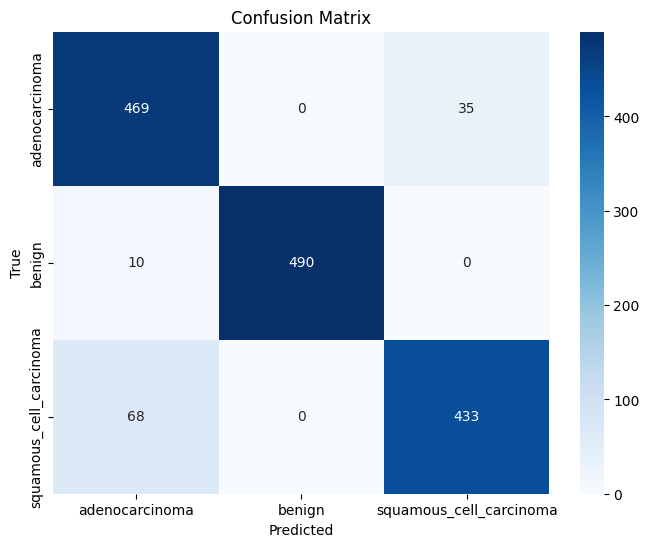

In [ ]:
# prompt: create a confusion matrix for test data using the model above

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the classes for the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes from the test generator
true_classes = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## New Results and Changes made

Compared to the original code, most is the same however, there is one major change made. The model parameters were updated which showed a significant improvement in results. The Original code had the model increase the number of nodes per layer then at the end flattening and producing one of 3 results. This was not effectively working due to the data not being able to properly classify the data due to so many nodes being made with all different kinds of data. The change made in this code, starts with more nodes at the beginning and each layer decreases the number of nodes effectively being able to filter and classify the data into the 3 categories.

Looking at the results of the confusion matrix most of the datapoints were accurately predicted. One thing to note is that there were 118 data points that were predicted as squamous_cell_carcinoma and was actually adenocarcinoma. This can be due to some cases of adenocarcinoma look very similar to what squamous_cell_carcinoma. Another reason could be that these data images provided in training for adenocarcinoma did not look like the 118 data examples that were in the test data samples. The test accuracy was 90% with train at 92% and validation at 91%